## General Info

### Language:
- German

### Corpus:
- https://wortschatz.uni-leipzig.de/en/download/German#deu_news_2022
(Wikipedia 100K)

In [1]:
#!pip install wordcloud
#!pip install compound_split
#!python -m spacy download de_core_news_md

## Imports

In [2]:
import nltk
import spacy
import wordcloud
import matplotlib
import matplotlib.pyplot as plt
from nltk import *
from nltk.corpus import stopwords

## Corpus

In [3]:
FILE = 'deu_wikipedia_2021_100K-sentences.txt'
f = open(FILE, encoding='utf-8', mode='r')
text = f.read()
with open(FILE, encoding='utf-8') as f:
    read_data = f.read()

## Defining stopwords

In [4]:
#stopword_list = set(stopwords.words('german'))
stopword_list = []

with open('bbalet_stopwords_de.txt',encoding='utf-8', mode='r') as file:
    for line in file:
        word = line.strip()
        stopword_list.append(word)

## Text preprocessing

In [5]:
lines = text.split('\n')
my_list = []
for line in lines:
    line = line[3:]
    if len(line) == 0:
        continue
    i = 0
    while line[i] not in '(1234567890' and not line[i].isalpha():
        i += 1
    line = line[i:]
    my_list.append(line)

In [6]:
cleaned_text = '\n'.join(my_list)

In [7]:
words = word_tokenize(cleaned_text)

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+-?\w+')
words_no_punct = tokenizer.tokenize(cleaned_text)

## Calculate the lexical richness of the corpus

In [8]:
words_num = len(words)
print("Number of words: ", words_num)

Number of words:  1849753


In [9]:
unique_words_num = len(set([word.lower() for word in words]))
print("Unique words:", unique_words_num)

Unique words: 185598


In [10]:
lexical_richness = unique_words_num / words_num
print("Lexical Richness:", lexical_richness)

Lexical Richness: 0.10033663954052244


## Plot the character distribution of the corpus

[('e', 1463327), ('n', 855984), ('i', 705369), ('r', 691195), ('t', 559221), ('s', 558353), ('a', 515761), ('d', 450864), ('h', 365421), ('u', 352950), ('l', 332173), ('g', 263839), ('c', 237026), ('o', 236684), ('m', 236549), ('b', 191059), ('f', 155517), ('w', 129953), ('k', 123822), ('z', 109836), ('v', 87471), ('p', 86026), ('ü', 53194), ('ä', 50352), ('j', 27104)]


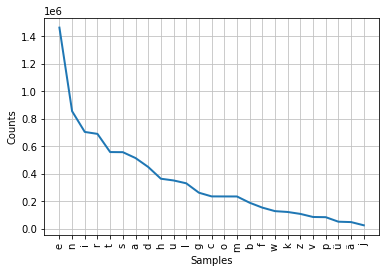

In [11]:
fdist = nltk.FreqDist(ch.lower() for ch in read_data if ch.isalpha())
print(fdist.most_common(25))
plot = fdist.plot(25)

## Plot the word distribution of the 20 most often used words (with stopwords)

[('der', 49887), ('und', 41827), ('die', 38317), ('in', 26377), ('von', 18562), ('den', 16864), ('des', 14160), ('mit', 13698), ('Die', 13397), ('im', 12382), ('zu', 12139), ('wurde', 11550), ('das', 11256), ('sich', 10844), ('ist', 10523), ('auf', 10383), ('als', 10279), ('dem', 10241), ('er', 10129), ('eine', 9195), ('für', 8844), ('ein', 8487), ('war', 7350), ('an', 7213), ('auch', 6463)]


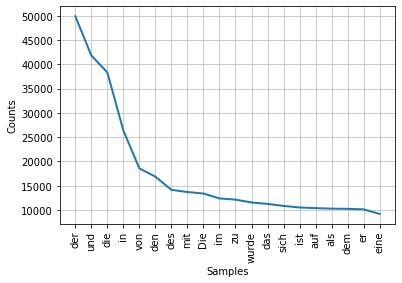

In [12]:
word_dist = nltk.FreqDist(words_no_punct)
print(word_dist.most_common(25))
plot = word_dist.plot(20)

## Plot the dispersion plot of the 5 most often used words

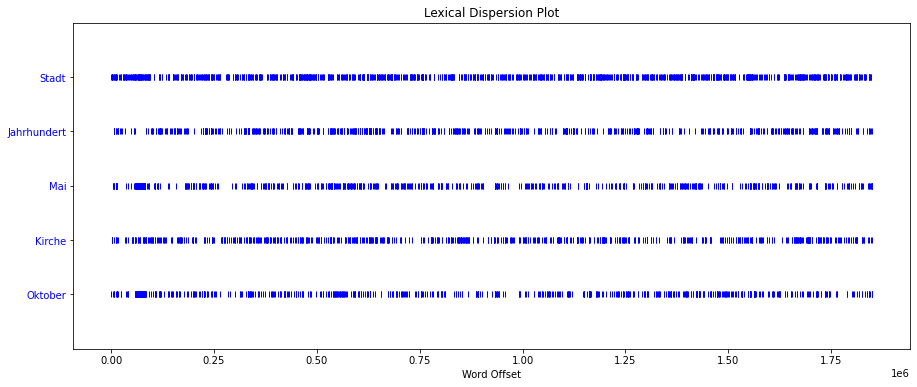

In [13]:
filtered_tokens = [word for word in words_no_punct if word.casefold() not in stopword_list and not word.casefold().isnumeric()]

top_words = [word for (word, freq) in nltk.FreqDist(filtered_tokens).most_common(5)]
mytext = nltk.Text(words)
plt.figure(figsize=(15, 6))
mytext.dispersion_plot(top_words)
plt.show()

## Find the longest word in the text and split it

In [14]:
# Find the longest word in the text
longest_word = max([word for word in words if word[0].isalpha()], key=len)
print("Longest word:", longest_word)

Longest word: Computer-Unterstütztes-Börsenhandels-und-Entscheidungssystem


In [15]:
# Select an algorithm for splitting words and split the word into subwords
from compound_split import doc_split
splitted_word = doc_split.doc_split(longest_word)

import re

subwords = re.findall(r'\w+', splitted_word)

print(subwords)

['Computer', 'Unterstütztes', 'Börsen', 'handels', 'und', 'Entscheidungs', 'system']


## Find a short sentence with 5 words

In [16]:
# Split the text into sentences using sent_tokenize()
sentences = nltk.sent_tokenize(cleaned_text)
i = 0
result_sentence = ""
# Find a sentence with 5 words
for sentence in sentences:
    tokenizer = RegexpTokenizer(r'\w+')
    words_in_sentence = tokenizer.tokenize(sentence)
    if len(words_in_sentence) == 5:
        if i == 0:
            result_sentence = sentence
        i+=1

In [17]:
result_sentence

'Aarau wurde zur Hauptstadt bestimmt.'

## Create a context-free grammar

In [18]:
groucho_grammar = nltk.CFG.fromstring("""
... S -> NP VP '.'
... NP -> DET N | N 
... VP -> V PP | V NP | V NP V
... DET -> 'zur'
... N -> 'Hauptstadt' | 'Aarau'
... V -> 'wurde' | 'bestimmt'
""")

In [19]:
parser = nltk.ChartParser(groucho_grammar)
result_token = nltk.word_tokenize(result_sentence)
print(result_token)
for tree in parser.parse(result_token):
    print(tree)

['Aarau', 'wurde', 'zur', 'Hauptstadt', 'bestimmt', '.']
(S
  (NP (N Aarau))
  (VP (V wurde) (NP (DET zur) (N Hauptstadt)) (V bestimmt))
  .)


## Select a suitable stemmer and stem every word in the sentence

In [20]:
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

# Stem the sentence from previous block
stemmer = SnowballStemmer(language='german')
tokens = nltk.word_tokenize(result_sentence)

stemmed_tokens = [stemmer.stem(word) for word in tokens]
stemmed_sentence = " ".join(stemmed_tokens)
stemmed_sentence

'aarau wurd zur hauptstadt bestimmt .'

In [21]:
# Stem the subwords for longest word
stemmed_tokens = [stemmer.stem(word) for word in subwords]
stemmed_sentence = " ".join(stemmed_tokens)
stemmed_sentence

'comput unterstutzt bors handel und entscheid syst'

## Find a lemmatizer for the language and lemmatize every word in the sentence

In [22]:
nlp = spacy.load('de_core_news_md')
doc = nlp(result_sentence)
lemmatized_sentence = ' '.join([x.lemma_ for x in doc]) 
lemmatized_sentence

'Aarau werden zu Hauptstadt bestimmen --'

## Remove stopwords and word distribution 

[('Stadt', 1252), ('Jahrhundert', 866), ('Mai', 810), ('Kirche', 795), ('Oktober', 788), ('Januar', 773), ('Juni', 769), ('liegt', 768), ('Namen', 766), ('Dezember', 748), ('ebenfalls', 748), ('November', 735), ('April', 732), ('September', 727), ('März', 705)]


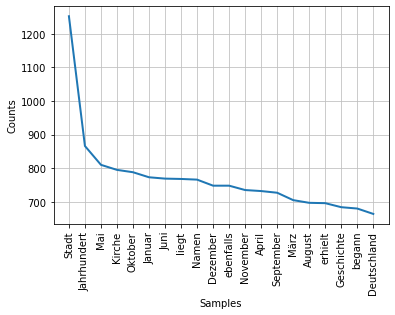

In [23]:
filtered_tokens = [word for word in words_no_punct if word.casefold() not in stopword_list and not word.casefold().isnumeric()]

word_dist_new = nltk.FreqDist(filtered_tokens)
print(word_dist_new.most_common(15))
plot = word_dist_new.plot(20)

## Wordcloud

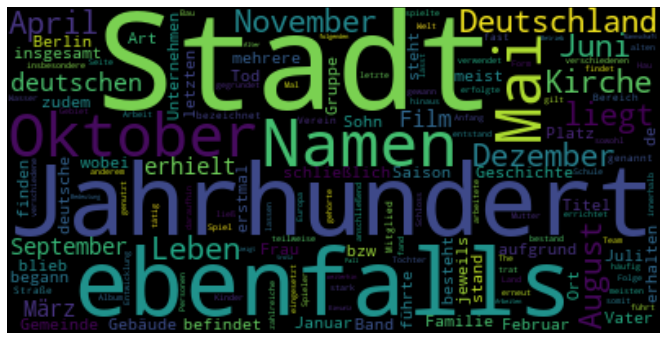

In [24]:
from wordcloud import WordCloud

plt.figure(figsize=(15, 6))

wordcloud = WordCloud(stopwords=stopword_list).generate(' '.join(filtered_tokens))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()